<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/ML_08_Ridge_Vs_Lasso_Vs_Elastic(Regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias:
Biases are the underlying assumptions that are made by data to simplify the target function. Bias does help us generalize the data better and make the model less sensitive to single data points. It also decreases the training time because of the decrease in complexity of target function High bias suggest that there is more assumption taken on target function. This leads to the underfitting of the model sometimes.
Examples of High bias Algorithms include Linear Regression, Logistic Regression etc.

# Variance:
In machine learning, Variance is a type of error that occurs due to a model’s sensitivity to small fluctuations in the dataset. The high variance would cause an algorithm to model the outliers/noise in the training set. This is most commonly referred to as overfitting. In this situation, the model basically learns every data point and does not offer good prediction when it tested on a novel dataset.
Examples of High variance Algorithms include Decision Tree, KNN etc.

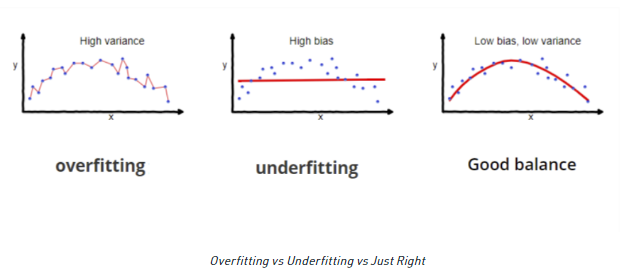

# Implementation

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

We are going to use the Boston house prediction dataset. This dataset is present in the datasets module of sklearn (scikit-learn) library. We can import this dataset as follows.

In [306]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

We can conclude from the above description that we have 13 independent variable and one dependent (House price) variable. Now we need to check for a correlation between independent and dependent variable. We can use scatterplot/corrplot for this.

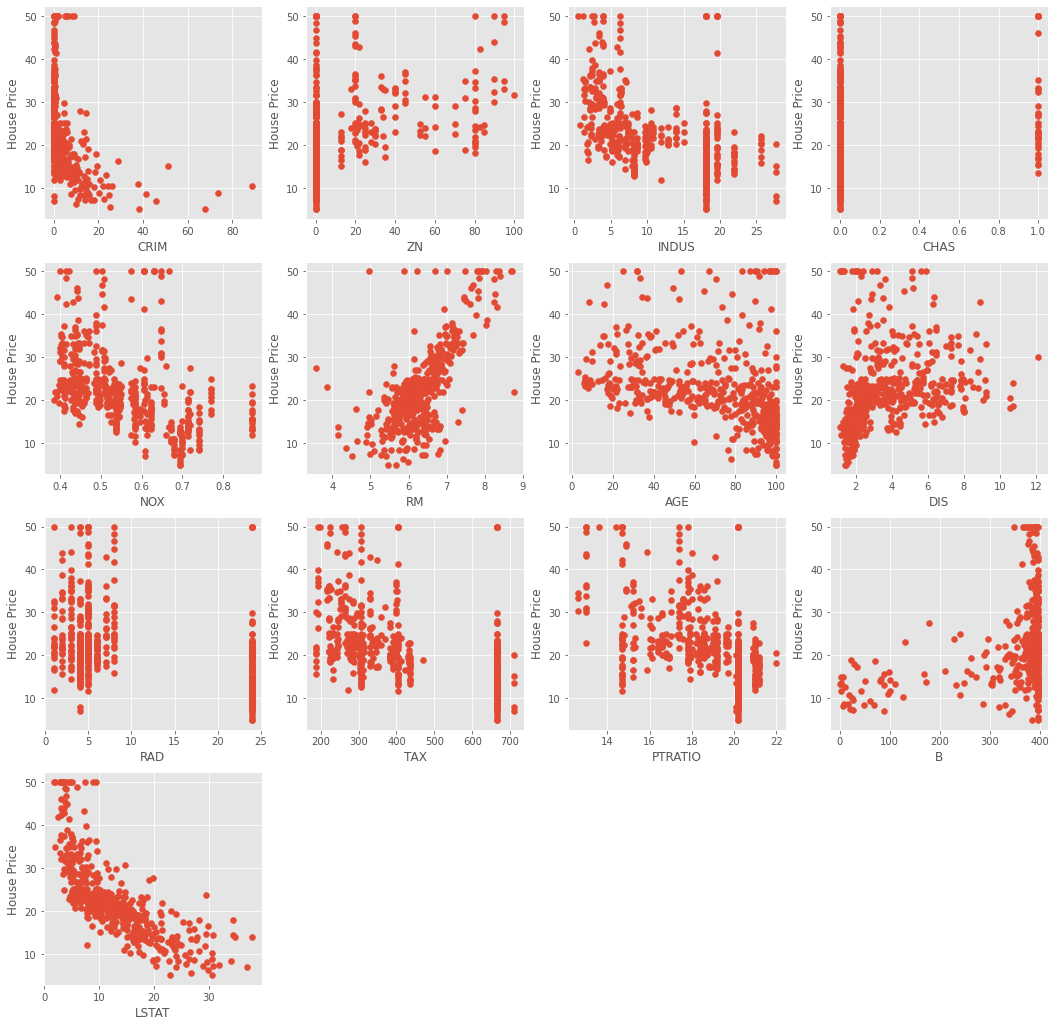

In [307]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()


We can observe from the above scatter plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. These variables will get their coefficients to be reduced in regularization. 

In [308]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


Now, we apply train-test split to divide the dataset into two parts, one for training and another for testing. We will be using 25% of the data for testing. 

In [309]:
x_train, x_test, y_train, y_test = train_test_split(
	boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
	test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))


Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


# Multiple (Linear) Regression 
Now it’s the right time to test the models. We will be using multiple Linear Regression first. We train the model on training data and calculate the MSE on test. 

Calculate MSE on Test set, coefficient, R2 score and Adj. R2 score.

In [310]:
#MSE for test and their coefficient:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error, '\n\n')

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient, '\n\n')

# R_square
R_square = lreg.score(x_test,y_test)
print('R square obtain for scikit learn library is :',R_square, '\n\n')

# RMSE 
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(lreg_y_pred, y_test , squared=False)
print('Root mean squared error is:', mse, '\n\n')

# adjusted r2 score

test_adjusted_r2score=1-(1-0.73129)*(127-1)/(127-13-1)
print('Test_adjusted_r2score:',test_adjusted_r2score)

Mean squared Error on test set :  17.621154951250393 


    Columns  Coefficient Estimate
0      CRIM             -0.143947
1        ZN              0.044924
2     INDUS              0.029297
3      CHAS              2.130238
4       NOX            -17.467461
5        RM              3.975421
6       AGE              0.007228
7       DIS             -1.487756
8       RAD              0.313908
9       TAX             -0.011642
10  PTRATIO             -0.991898
11        B              0.010730
12    LSTAT             -0.548121 


R square obtain for scikit learn library is : 0.7259802072377399 


Root mean squared error is: 4.197755942316132 


Test_adjusted_r2score: 0.7003764601769911


Let’s plot a bar chart of above coefficients using matplotlib plotting library. 


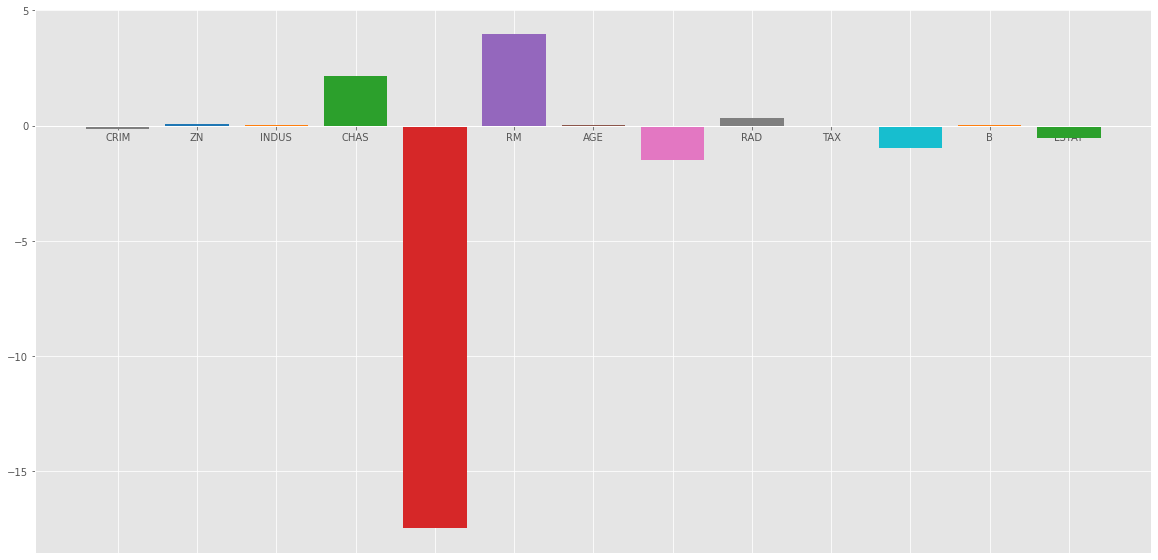

In [311]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

As we can observe that lots of the variables have an insignificant coefficient, these coefficients did not contribute to the model very much and need to regulate or even eliminate some of these variables.

Calculate MSE on Train set, coefficient, R2 score and Adj. R2 score.

In [312]:
#MSE for train and their coefficient:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on train set
lreg_y_pred = lreg.predict(x_train)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_train)**2)
print("Mean squared Error on train set : ", mean_squared_error, '\n\n')

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient, '\n\n')

# R_square
R_square = lreg.score(x_train,y_train)
print('R square obtain for scikit learn library is :',R_square, '\n\n')

# RMSE 
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(lreg_y_pred, y_train , squared=False)
print('Root mean squared error is:', mse, '\n\n')

# adjusted r2 score

train_adjusted_r2score=1-(1-0.73897)*(379-1)/(379-13-1)
print('Train_adjusted_r2score:',train_adjusted_r2score)


Mean squared Error on train set :  23.555508276345474 


    Columns  Coefficient Estimate
0      CRIM             -0.143947
1        ZN              0.044924
2     INDUS              0.029297
3      CHAS              2.130238
4       NOX            -17.467461
5        RM              3.975421
6       AGE              0.007228
7       DIS             -1.487756
8       RAD              0.313908
9       TAX             -0.011642
10  PTRATIO             -0.991898
11        B              0.010730
12    LSTAT             -0.548121 


R square obtain for scikit learn library is : 0.741361406270814 


Root mean squared error is: 4.853401722127015 


Train_adjusted_r2score: 0.7296730410958905


Calculate MAE on Test set, coefficient, R2 score and Adj. R2 score.

In [313]:
#MAE for test and their Coefficient:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Absolute Error (mae)
mean_absolute_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean_absolute_error on test set : ", mean_absolute_error, '\n\n')

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient, '\n\n')

# R_square
R_square = lreg.score(x_test,y_test)
print('R square obtain for scikit learn library is :',R_square, '\n\n')

# RMSE 
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(lreg_y_pred, y_test)
print('Root mean absolute error is:', mae, '\n\n')

# adjusted r2 score

test_adjusted_r2score=1-(1-0.73129)*(127-1)/(127-13-1)
print('Test_adjusted_r2score:',test_adjusted_r2score)

Mean_absolute_error on test set :  17.621154951250393 


    Columns  Coefficient Estimate
0      CRIM             -0.143947
1        ZN              0.044924
2     INDUS              0.029297
3      CHAS              2.130238
4       NOX            -17.467461
5        RM              3.975421
6       AGE              0.007228
7       DIS             -1.487756
8       RAD              0.313908
9       TAX             -0.011642
10  PTRATIO             -0.991898
11        B              0.010730
12    LSTAT             -0.548121 


R square obtain for scikit learn library is : 0.7259802072377399 


Root mean absolute error is: 3.081699250245043 


Test_adjusted_r2score: 0.7003764601769911


Calculate MAE on Train set, coefficient, R2 score and Adj. R2 score.

In [314]:
#MAE for train and their Coefficient:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_train)

# calculating Mean Absolute Error (mae)
mean_absolute_error = np.mean((lreg_y_pred - y_train)**2)
print("Mean_absolute_error on train set : ", mean_absolute_error, '\n\n')

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient, '\n\n')

# R_square
R_square = lreg.score(x_train,y_train)
print('R square obtain for scikit learn library is :',R_square, '\n\n')

# RMSE 
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(lreg_y_pred, y_train)
print('Root mean absolute error is:', mae, '\n\n')

# adjusted r2 score

train_adjusted_r2score=1-(1-0.73897)*(379-1)/(379-13-1)
print('Train_adjusted_r2score:',train_adjusted_r2score)

Mean_absolute_error on train set :  23.555508276345474 


    Columns  Coefficient Estimate
0      CRIM             -0.143947
1        ZN              0.044924
2     INDUS              0.029297
3      CHAS              2.130238
4       NOX            -17.467461
5        RM              3.975421
6       AGE              0.007228
7       DIS             -1.487756
8       RAD              0.313908
9       TAX             -0.011642
10  PTRATIO             -0.991898
11        B              0.010730
12    LSTAT             -0.548121 


R square obtain for scikit learn library is : 0.741361406270814 


Root mean absolute error is: 3.3622681668102095 


Train_adjusted_r2score: 0.7296730410958905


## Intercept calculations

In [315]:
#MSE for test and their Intersept:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error, '\n\n')

# Putting together the interseption and their corresponding variable names
lreg_intercept = pd.DataFrame()
lreg_intercept["Columns"] = x_train.columns
lreg_intercept['Interseption Estimate'] = pd.Series(lreg.intercept_)
print(lreg_intercept)

Mean squared Error on test set :  17.621154951250393 


    Columns  Interseption Estimate
0      CRIM              35.055009
1        ZN                    NaN
2     INDUS                    NaN
3      CHAS                    NaN
4       NOX                    NaN
5        RM                    NaN
6       AGE                    NaN
7       DIS                    NaN
8       RAD                    NaN
9       TAX                    NaN
10  PTRATIO                    NaN
11        B                    NaN
12    LSTAT                    NaN


# Ridge Regression: 
Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. This term is the sum of squares of coefficient multiplied by the parameter The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. This term is called L2 regularization. 

In [316]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)    #As compare to linear reg. mse for ridge and coefficient is low.

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('mean squared error ridge:', mean_squared_error_ridge, '\n\n')

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


mean squared error ridge: 17.87895614061059 


    Columns  Coefficient Estimate
0      CRIM             -0.141623
1        ZN              0.045942
2     INDUS              0.000271
3      CHAS              2.062959
4       NOX             -9.426758
5        RM              4.016730
6       AGE              0.000016
7       DIS             -1.361823
8       RAD              0.293657
9       TAX             -0.012297
10  PTRATIO             -0.901992
11        B              0.011015
12    LSTAT             -0.558985


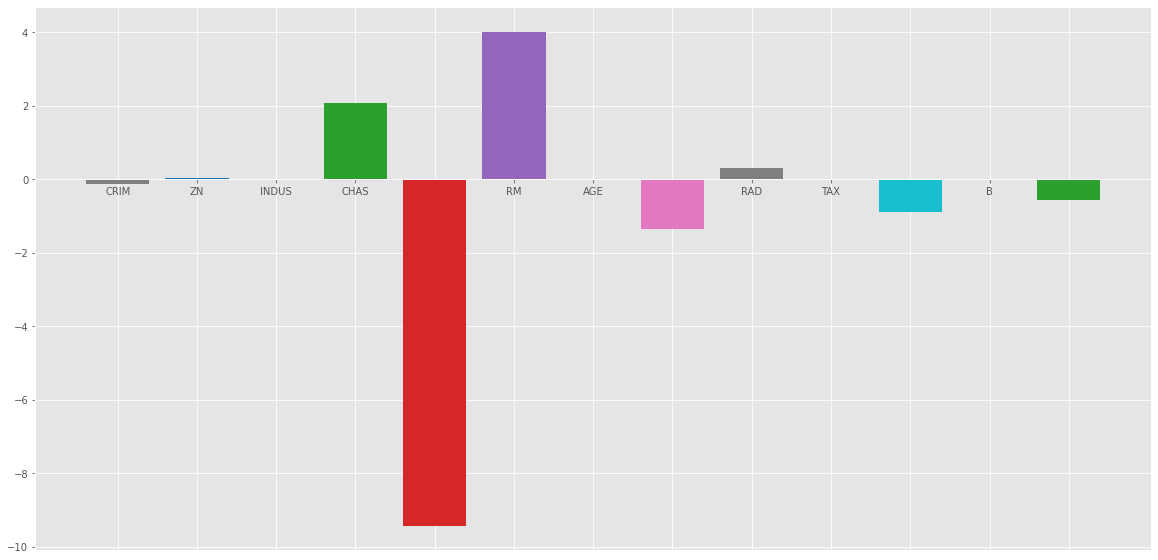

In [317]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


In [318]:
#In the above graph we take \alpha = 1. 
#Let’s try at another bar plot with \alpha = 10 (homework)

## Play with alpha values for test data




In [319]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 0)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('mean squared error ridge:',mean_squared_error_ridge, '\n\n')

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


mean squared error ridge: 17.621154951250418 


    Columns  Coefficient Estimate
0      CRIM             -0.143947
1        ZN              0.044924
2     INDUS              0.029297
3      CHAS              2.130238
4       NOX            -17.467461
5        RM              3.975421
6       AGE              0.007228
7       DIS             -1.487756
8       RAD              0.313908
9       TAX             -0.011642
10  PTRATIO             -0.991898
11        B              0.010730
12    LSTAT             -0.548121


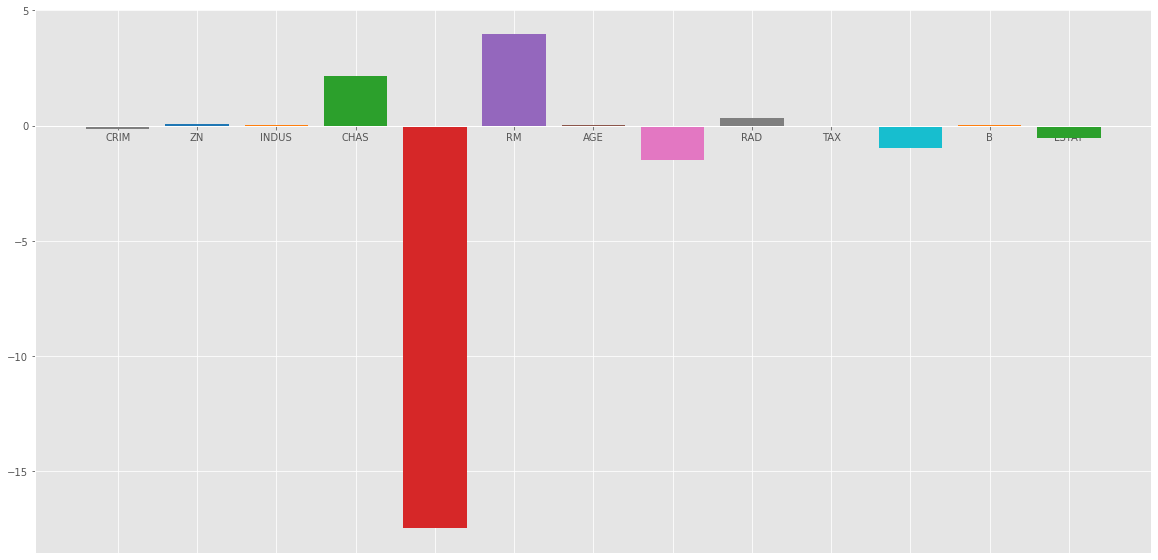

In [320]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [321]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 10)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('mean squared error ridge:', mean_squared_error_ridge, '\n\n')

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


mean squared error ridge: 18.484037045861303 


    Columns  Coefficient Estimate
0      CRIM             -0.139188
1        ZN              0.047887
2     INDUS             -0.026793
3      CHAS              1.575568
4       NOX             -1.838865
5        RM              3.801931
6       AGE             -0.004133
7       DIS             -1.238471
8       RAD              0.283956
9       TAX             -0.013395
10  PTRATIO             -0.829538
11        B              0.011163
12    LSTAT             -0.588711


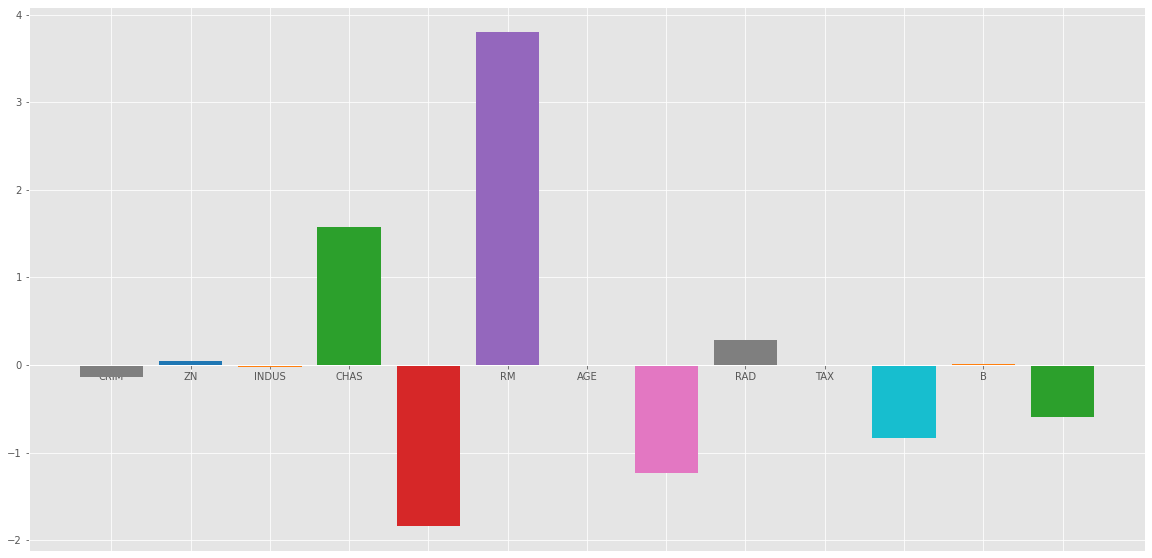

In [322]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

## Play with Alpha value for train data

In [323]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_train)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_train)**2)
print('mean squared error ridge:', mean_squared_error_ridge, '\n\n')

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

mean squared error ridge: 23.756097658235625 


    Columns  Coefficient Estimate
0      CRIM             -0.141623
1        ZN              0.045942
2     INDUS              0.000271
3      CHAS              2.062959
4       NOX             -9.426758
5        RM              4.016730
6       AGE              0.000016
7       DIS             -1.361823
8       RAD              0.293657
9       TAX             -0.012297
10  PTRATIO             -0.901992
11        B              0.011015
12    LSTAT             -0.558985


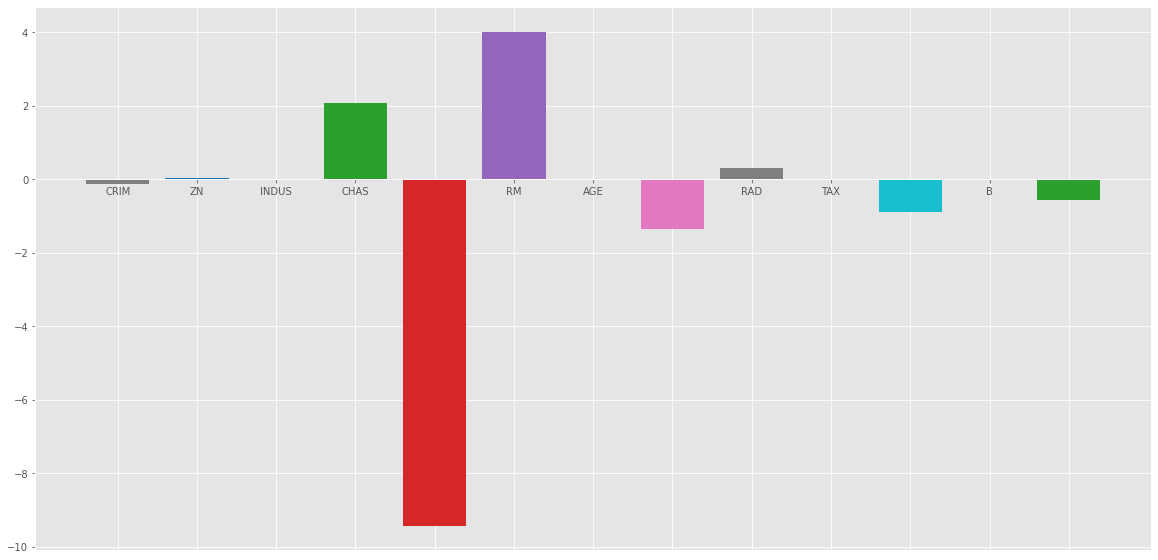

In [324]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [325]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 0)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_train)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_train)**2)
print('mean squared error ridge:', mean_squared_error_ridge, '\n\n')

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

mean squared error ridge: 23.555508276345474 


    Columns  Coefficient Estimate
0      CRIM             -0.143947
1        ZN              0.044924
2     INDUS              0.029297
3      CHAS              2.130238
4       NOX            -17.467461
5        RM              3.975421
6       AGE              0.007228
7       DIS             -1.487756
8       RAD              0.313908
9       TAX             -0.011642
10  PTRATIO             -0.991898
11        B              0.010730
12    LSTAT             -0.548121


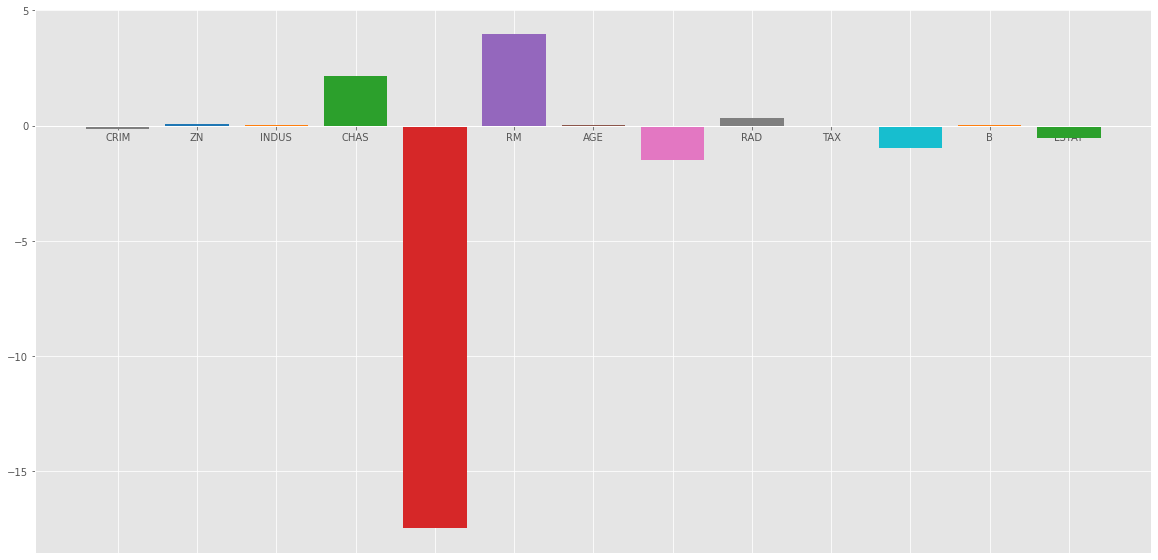

In [326]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [327]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 10)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_train)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_train)**2)
print('mean squared error ridge:', mean_squared_error_ridge, '\n\n')

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

mean squared error ridge: 24.36551780824078 


    Columns  Coefficient Estimate
0      CRIM             -0.139188
1        ZN              0.047887
2     INDUS             -0.026793
3      CHAS              1.575568
4       NOX             -1.838865
5        RM              3.801931
6       AGE             -0.004133
7       DIS             -1.238471
8       RAD              0.283956
9       TAX             -0.013395
10  PTRATIO             -0.829538
11        B              0.011163
12    LSTAT             -0.588711


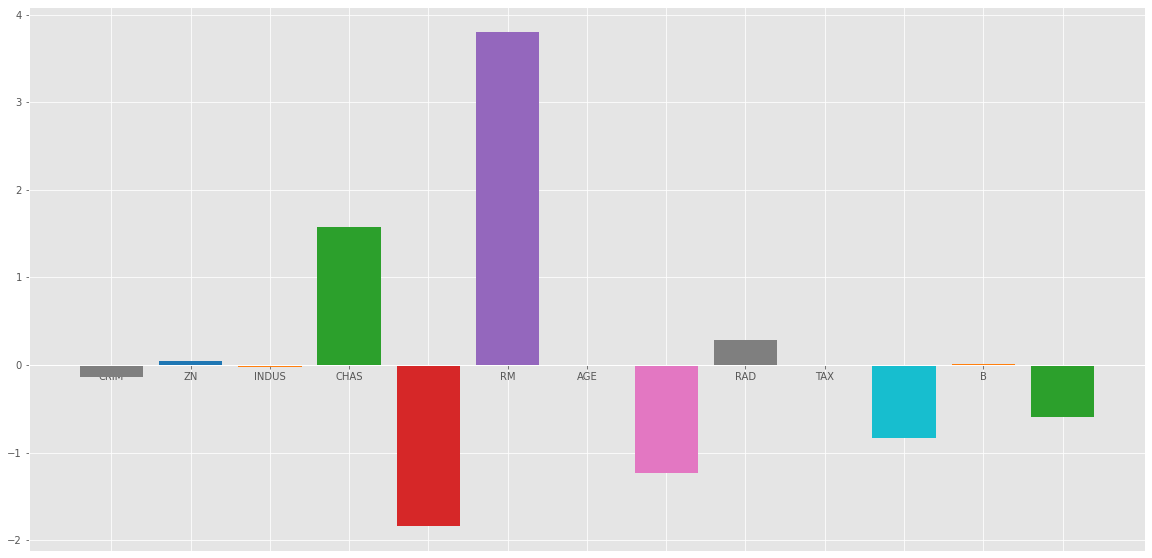

In [328]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [329]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 100)     #Lot of diff display while increase the alpha value in reg as comapre to lreg 
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print('mean squared error ridge:', mean_squared_error_ridge, '\n\n')

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

mean squared error ridge: 18.90686825411328 


    Columns  Coefficient Estimate
0      CRIM             -0.131001
1        ZN              0.052389
2     INDUS             -0.035413
3      CHAS              0.506585
4       NOX             -0.196875
5        RM              2.249397
6       AGE              0.011600
7       DIS             -1.098935
8       RAD              0.318844
9       TAX             -0.015597
10  PTRATIO             -0.845038
11        B              0.009954
12    LSTAT             -0.706170


# Lasso Regression: 
Lasso Regression is similar to Ridge regression except here we add Mean Absolute value of coefficients in place of mean square value. Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0. The new term we added to Ordinary Least Square(OLS) is called L1 Regularization.


Code : Python code implementing the Lasso Regression 

In [330]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)


Mean squared error on test set 20.198790636347255
    Columns  Coefficient Estimate
0      CRIM             -0.081135
1        ZN              0.044821
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.381388
6       AGE              0.030774
7       DIS             -0.611666
8       RAD              0.247518
9       TAX             -0.014345
10  PTRATIO             -0.699602
11        B              0.008284
12    LSTAT             -0.779949


In [331]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error, '\n\n')
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 17.621154951250393 


    Columns  Coefficient Estimate
0      CRIM             -0.143947
1        ZN              0.044924
2     INDUS              0.029297
3      CHAS              2.130238
4       NOX            -17.467461
5        RM              3.975421
6       AGE              0.007228
7       DIS             -1.487756
8       RAD              0.313908
9       TAX             -0.011642
10  PTRATIO             -0.991898
11        B              0.010730
12    LSTAT             -0.548121


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.464e+03, tolerance: 3.452e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

In [332]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 10)  #While Alpha value increase the coefficients or weights is becomes zero(0).
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error, '\n\n')
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 28.914806721877657 


    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.025776
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX              0.000000
5        RM              0.000000
6       AGE              0.010335
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.010017
10  PTRATIO             -0.000000
11        B              0.006229
12    LSTAT             -0.628152


## Calculate Intercept for lasso

In [333]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error, '\n\n')
lasso_intercept = pd.DataFrame()
lasso_intercept["Columns"] = x_train.columns
lasso_intercept['Interseption Estimate'] = pd.Series(lasso.intercept_)

print(lasso_intercept)

Mean squared error on test set 20.198790636347255 


    Columns  Interseption Estimate
0      CRIM              37.180795
1        ZN                    NaN
2     INDUS                    NaN
3      CHAS                    NaN
4       NOX                    NaN
5        RM                    NaN
6       AGE                    NaN
7       DIS                    NaN
8       RAD                    NaN
9       TAX                    NaN
10  PTRATIO                    NaN
11        B                    NaN
12    LSTAT                    NaN


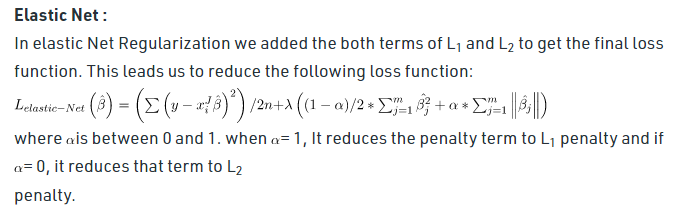

In [334]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 20.16054222912566


,Columns,Coefficient Estimate
0,CRIM,-0.099470
1,ZN,0.050934
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.102664
6,AGE,0.030634
7,DIS,-0.721081
8,RAD,0.295989
9,TAX,-0.016257


In [335]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 0)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 17.621154951250393


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.464e+03, tolerance: 3.452e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

,Columns,Coefficient Estimate
0,CRIM,-0.143947
1,ZN,0.044924
2,INDUS,0.029297
3,CHAS,2.130238
4,NOX,-17.467461
5,RM,3.975421
6,AGE,0.007228
7,DIS,-1.487756
8,RAD,0.313908
9,TAX,-0.011642


In [336]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 10)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 28.59390598050514


,Columns,Coefficient Estimate
0,CRIM,-0.000000
1,ZN,0.042604
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,0.000000
5,RM,0.000000
6,AGE,0.033753
7,DIS,-0.000000
8,RAD,0.000000
9,TAX,-0.009945


## Add y_pred on booston dataset

In [337]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, Y)

LinearRegression()

In [338]:
y_pred = lin.predict(X)
boston_pd['y_pred'] = y_pred

In [339]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price,y_pred
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524


## Plot the polynomial linear regression

In [340]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, Y)

LinearRegression()

In [341]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(x_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


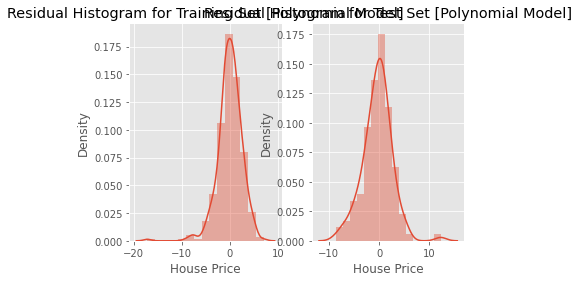

In [342]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

In [343]:
from sklearn.preprocessing import PolynomialFeatures

#create_polynomial_regression_model(degree):
  #"Creates a polynomial regression model for the given degree"
  
poly_features = PolynomialFeatures(degree=2)
  
  # transforms the existing features to higher degree features.
x_train_poly = poly_features.fit_transform(x_train)
  
  # fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
  
  # predicting on training data-set
y_train_predicted = poly_model.predict(x_train_poly)
  
  # predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))

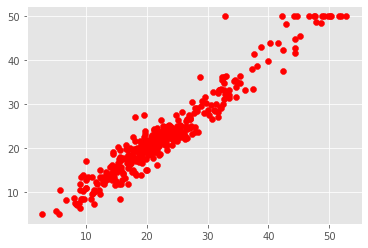

In [344]:
plt.scatter(y_train_predicted, y_train, c = "red")

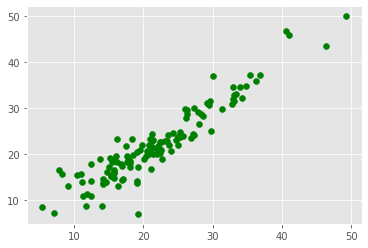

In [345]:
plt.scatter(y_test_predict, y_test, c = "green")

In [348]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

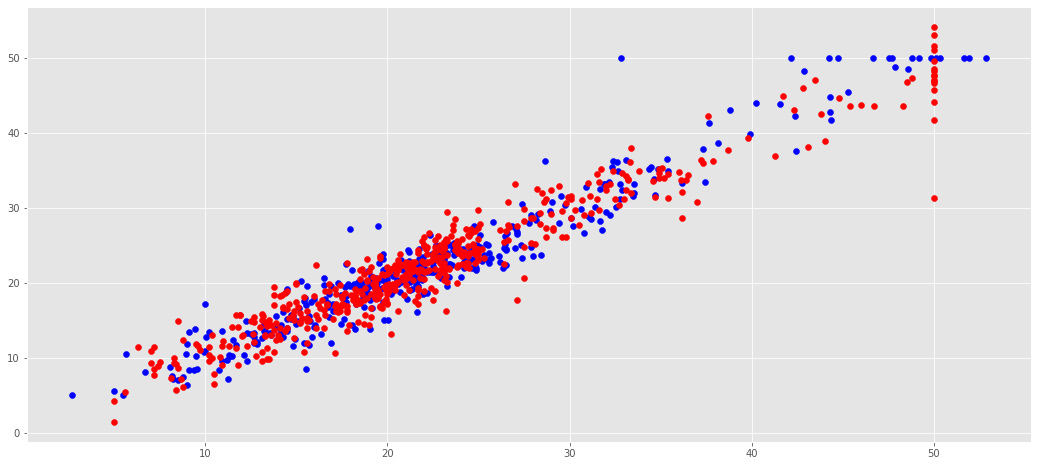

In [349]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)

pr_model = LinearRegression()
pr_model.fit(X_poly, Y)

y_pred = pr_model.predict(X_poly)
plt.figure(figsize = (18,8))
plt.scatter(y_train_predicted, y_train, c = "blue")
plt.scatter(Y, y_pred, c="red")
plt.plot(y_pred, lin.predict(poly_features.fit(X)), color = 'black')
#lreg.fit(x_train, y_train)


## Heatmap of co-relation

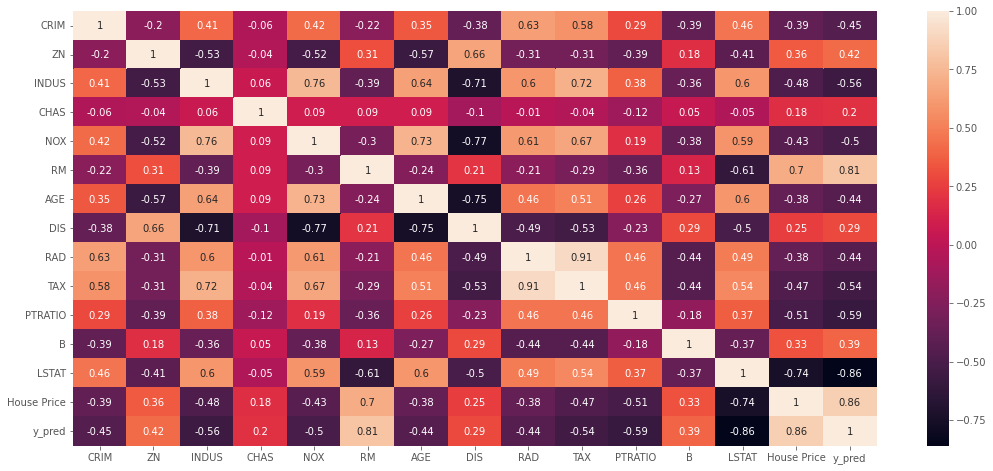

In [350]:
import seaborn as sns
correlation_matrix = boston_pd.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (18,8))
sns.heatmap(data=correlation_matrix, annot=True)

# Conclusion : 
From the above analysis we can reach the following conclusion about different regularization methods: 
 

* Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values. 
 
* Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables. 
 
* Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc. 
 
* Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases. 